**COVID-19 PROJECT**

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px #chloropleth
import warnings
warnings.filterwarnings("ignore")

In [5]:
#load the data
data = pd.read_csv("/content/covid_19_clean_complete.csv",parse_dates=['Date'])

In [6]:
data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [10]:
data.rename(columns={'Province/State':'state','Country/Region': 'country',	'Lat':'lat',	'Long':'long',	'Date':'date',	'Confirmed':'confirmed',	'Deaths':'deaths',	'Recovered':'recovered',	'Active':'active',	'WHO Region':'WHO Region'},inplace=True)

In [11]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
data['date'].value_counts()

2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: date, Length: 188, dtype: int64

In [13]:
data['date'].max()

Timestamp('2020-07-27 00:00:00')

In [14]:
top=data[data['date']==data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [18]:
w=top.groupby('country')['confirmed',	'deaths',	'recovered',	'active'].sum()
w= w.reset_index()
w

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [19]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                  range_color=[1,500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

Text(0, 0.5, 'Cases total')

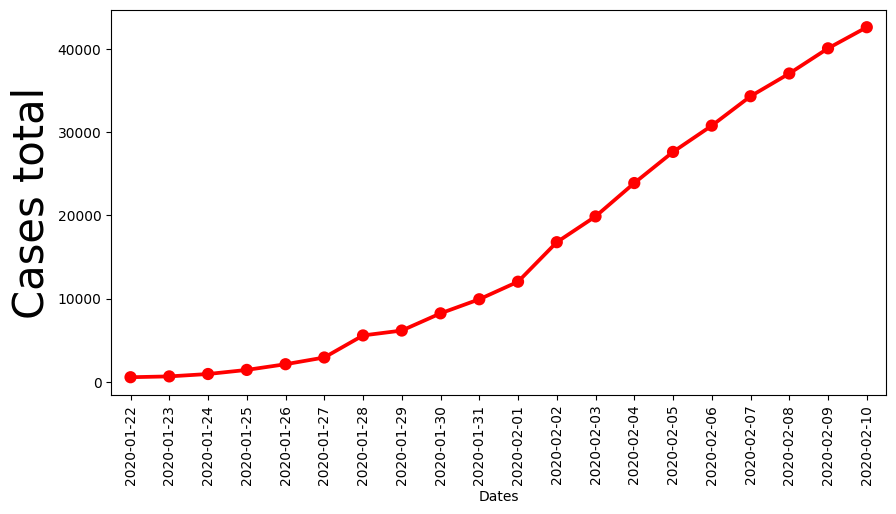

In [34]:
#plot for confirmed cases
plt.figure(figsize=(10,5))

t_cases= data.groupby('date')['confirmed'].sum().reset_index()
t_cases['data']=pd.to_datetime(t_cases['date'])


#point plot
sns.pointplot(x=t_cases['date'].dt.date.head(20),y=t_cases['confirmed'].head(20),color='r')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

,date,confirmed,data
0,2020-01-22,555,2020-01-22
1,2020-01-23,654,2020-01-23
2,2020-01-24,941,2020-01-24
3,2020-01-25,1434,2020-01-25
4,2020-01-26,2118,2020-01-26
...,...,...,...
183,2020-07-23,15510481,2020-07-23
184,2020-07-24,15791645,2020-07-24
185,2020-07-25,16047190,2020-07-25
186,2020-07-26,16251796,2020-07-26


In [ ]:
#Fb Prophet


In [37]:
pip install prophet

In [38]:
from prophet import Prophet

In [39]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [40]:
data.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [62]:
confirmed = data.groupby('date')['confirmed'].sum().reset_index()
deaths = data.groupby('date')['deaths'].sum().reset_index()
recovered = data.groupby('date')['recovered'].sum().reset_index()
active = data.groupby('date')['active'].sum().reset_index()




In [ ]:
#Forecasting for confirmed cases

In [48]:
confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()



,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [46]:
m=Prophet()
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/sum30hu9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/1b5qz9_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92161', 'data', 'file=/tmp/tmp5l7ehter/sum30hu9.json', 'init=/tmp/tmp5l7ehter/1b5qz9_5.json', 'output', 'file=/tmp/tmp5l7ehter/prophet_modelmbecuj1f/prophet_model-20231207071557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
future=m.make_future_dataframe(periods=7,freq='D')
future.tail(12)

,ds
183,2020-07-23
184,2020-07-24
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01


In [49]:
forecast = m.predict(future)

In [51]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.067684e+04,-1.286264e+05,8.975126e+04
1,2020-01-23,-8.050948e+03,-1.101298e+05,9.779594e+04
2,2020-01-24,5.827455e+03,-9.766880e+04,1.096777e+05
3,2020-01-25,1.217668e+04,-9.126162e+04,1.159954e+05
4,2020-01-26,8.405020e+03,-1.004771e+05,1.131885e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.664562e+07,1.684472e+07
191,2020-07-31,1.695910e+07,1.684848e+07,1.706677e+07
192,2020-08-01,1.716676e+07,1.705822e+07,1.727360e+07
193,2020-08-02,1.736430e+07,1.724676e+07,1.747463e+07


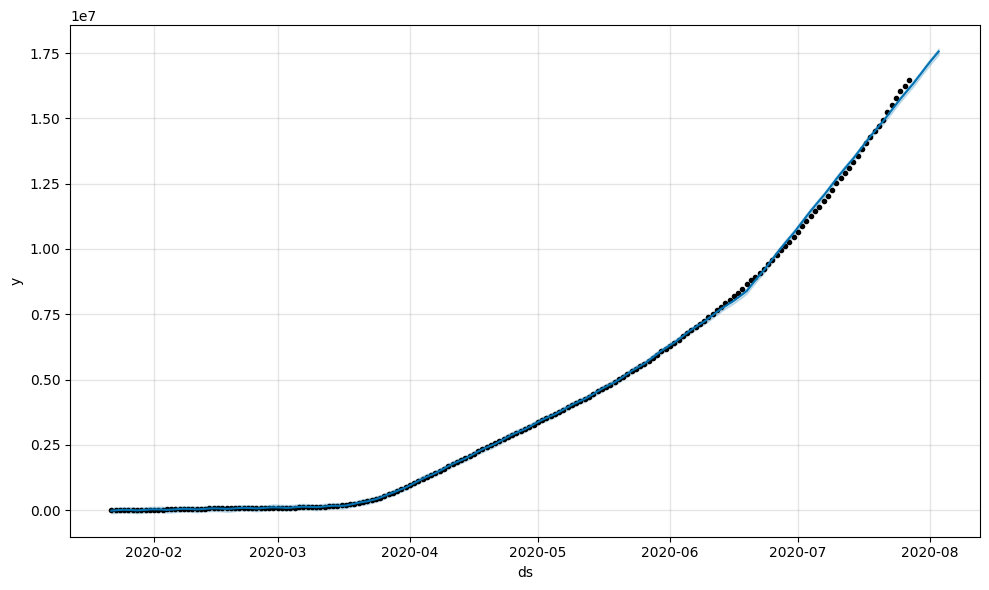

In [52]:
confirmed_cases_forecast=m.plot(forecast)

In [ ]:
# Forecasting for death cases

In [53]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [54]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])

In [56]:
m=Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=21)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/pgvg1fr1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/byjnkr0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73432', 'data', 'file=/tmp/tmp5l7ehter/pgvg1fr1.json', 'init=/tmp/tmp5l7ehter/byjnkr0o.json', 'output', 'file=/tmp/tmp5l7ehter/prophet_model_q_6n420/prophet_model-20231207072726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:27:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:27:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [57]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-713.300051,-2736.109429,1212.302716
1,2020-01-23,-43.747057,-2056.326433,1829.921394
2,2020-01-24,531.538048,-1454.453023,2493.236100
3,2020-01-25,473.857138,-1640.750545,2244.125109
4,2020-01-26,-328.938355,-2469.207292,1684.070997
...,...,...,...,...
204,2020-08-13,733903.099575,723880.346731,744121.985107
205,2020-08-14,739418.098237,728601.235289,750877.020086
206,2020-08-15,744300.130882,732464.271389,756482.034916
207,2020-08-16,748437.048945,735964.762604,761767.746314


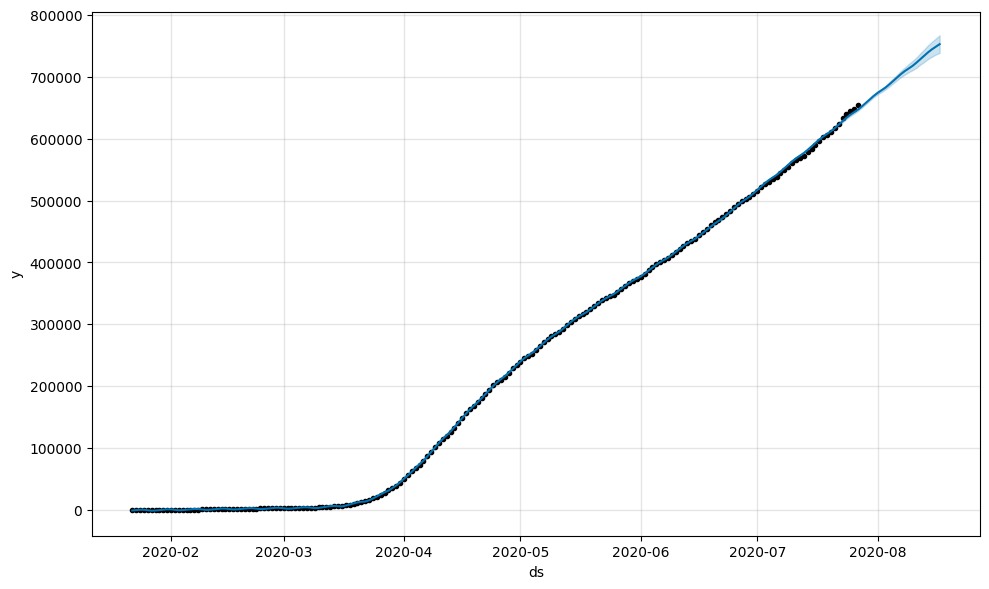

In [58]:
deaths_cases_forecast=m.plot(forecast)

In [65]:
forecast['yhat']=forecast['yhat'].astype(int)
forecast[['ds','yhat']].tail(25)

,ds,yhat
184,2020-07-24,6113443
185,2020-07-25,6175608
186,2020-07-26,6242899
187,2020-07-27,6296649
188,2020-07-28,6353415
189,2020-07-29,6415814
190,2020-07-30,6481273
191,2020-07-31,6549315
192,2020-08-01,6611479
193,2020-08-02,6678771


In [ ]:
#Forecasting for Recovered cases

In [66]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/yhq8kgws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/93mzr_vq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77423', 'data', 'file=/tmp/tmp5l7ehter/yhq8kgws.json', 'init=/tmp/tmp5l7ehter/93mzr_vq.json', 'output', 'file=/tmp/tmp5l7ehter/prophet_modelmh5ghlk4/prophet_model-20231207074026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


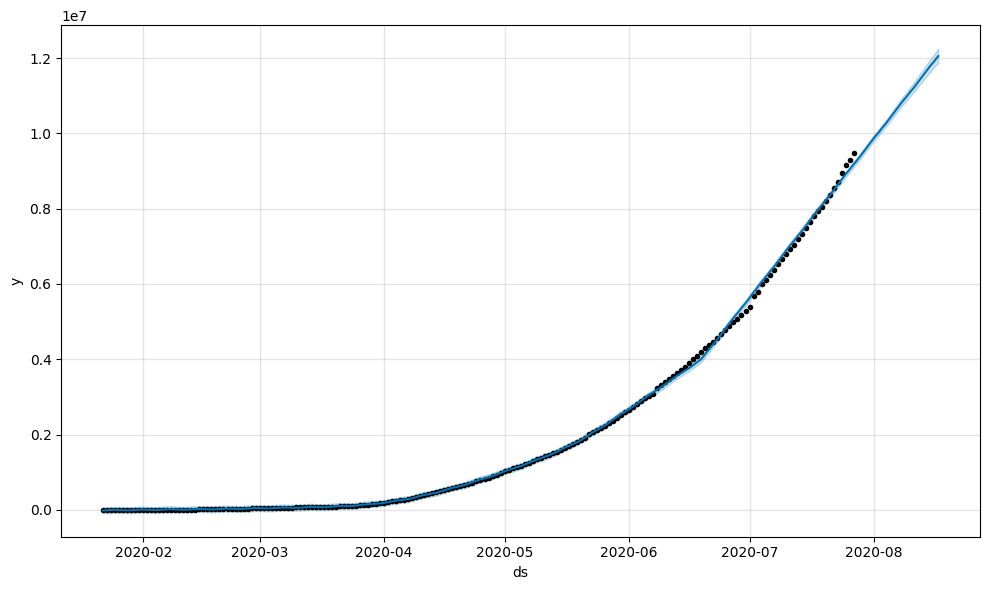

In [67]:
m=Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=21)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
recovered_cases_forecast=m.plot(forecast)

In [ ]:
#Forecasting for Active Cases

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/7rfmjerm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5l7ehter/j_h0grcb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52195', 'data', 'file=/tmp/tmp5l7ehter/7rfmjerm.json', 'init=/tmp/tmp5l7ehter/j_h0grcb.json', 'output', 'file=/tmp/tmp5l7ehter/prophet_modelnuk798qz/prophet_model-20231207073930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


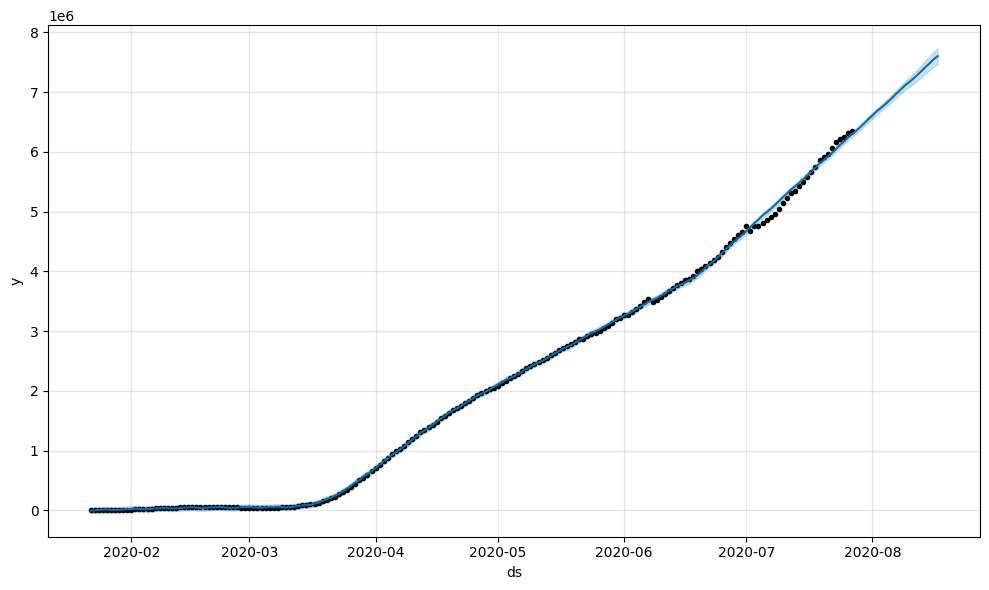

In [63]:
active.columns=['ds','y']
active['ds']=pd.to_datetime(active['ds'])
m=Prophet()
m.fit(active)
future=m.make_future_dataframe(periods=21)
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
active_cases_forecast=m.plot(forecast)